# Bike Sharing Case Study 
#### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. A US bike-sharing provider **BoomBikes** looking for increasing the revenue post Covid. 
The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands


## Step 1: Reading and Understanding the Data

In [159]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [160]:
# import csv data file
data = pd.read_csv('C:/Users/premchand.joshi/Python-11June23/ML1/BikeSharingAssignment/day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#check rows and coumns of data file 
data.shape 

(730, 16)

In [8]:
#check missing information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#Check columns where data is missing
#looks like there is no empty/null data
miss_column = data.columns[data.isnull().sum() > 0]
print(miss_column)

Index([], dtype='object')


In [161]:
# Remove some not required columns
# Drop 'casual' & 'registered' coumns as 'cnt' column already have the total count so other two are redundant
# Also drop 'instant' column becasue this is also simply a index and no business use of it

data.drop(['instant'], axis = 1, inplace = True)
data.drop(['casual'], axis = 1, inplace = True)
data.drop(['registered'], axis = 1, inplace = True)
#Drop dteday  column also as month and year coulmns are already available and this information don't need exact day of month for analysis
data.drop(['dteday'], axis = 1, inplace = True)
data.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [162]:
# convert data type for categorical columns as mentioned in the data dictionary
data['season']=data['season'].astype('category')
data['weathersit']=data['weathersit'].astype('category')
data['mnth']=data['mnth'].astype('category')
data['weekday']=data['weekday'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


## Step 2: Visualising the Data

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

**Visualising Numeric Variables**

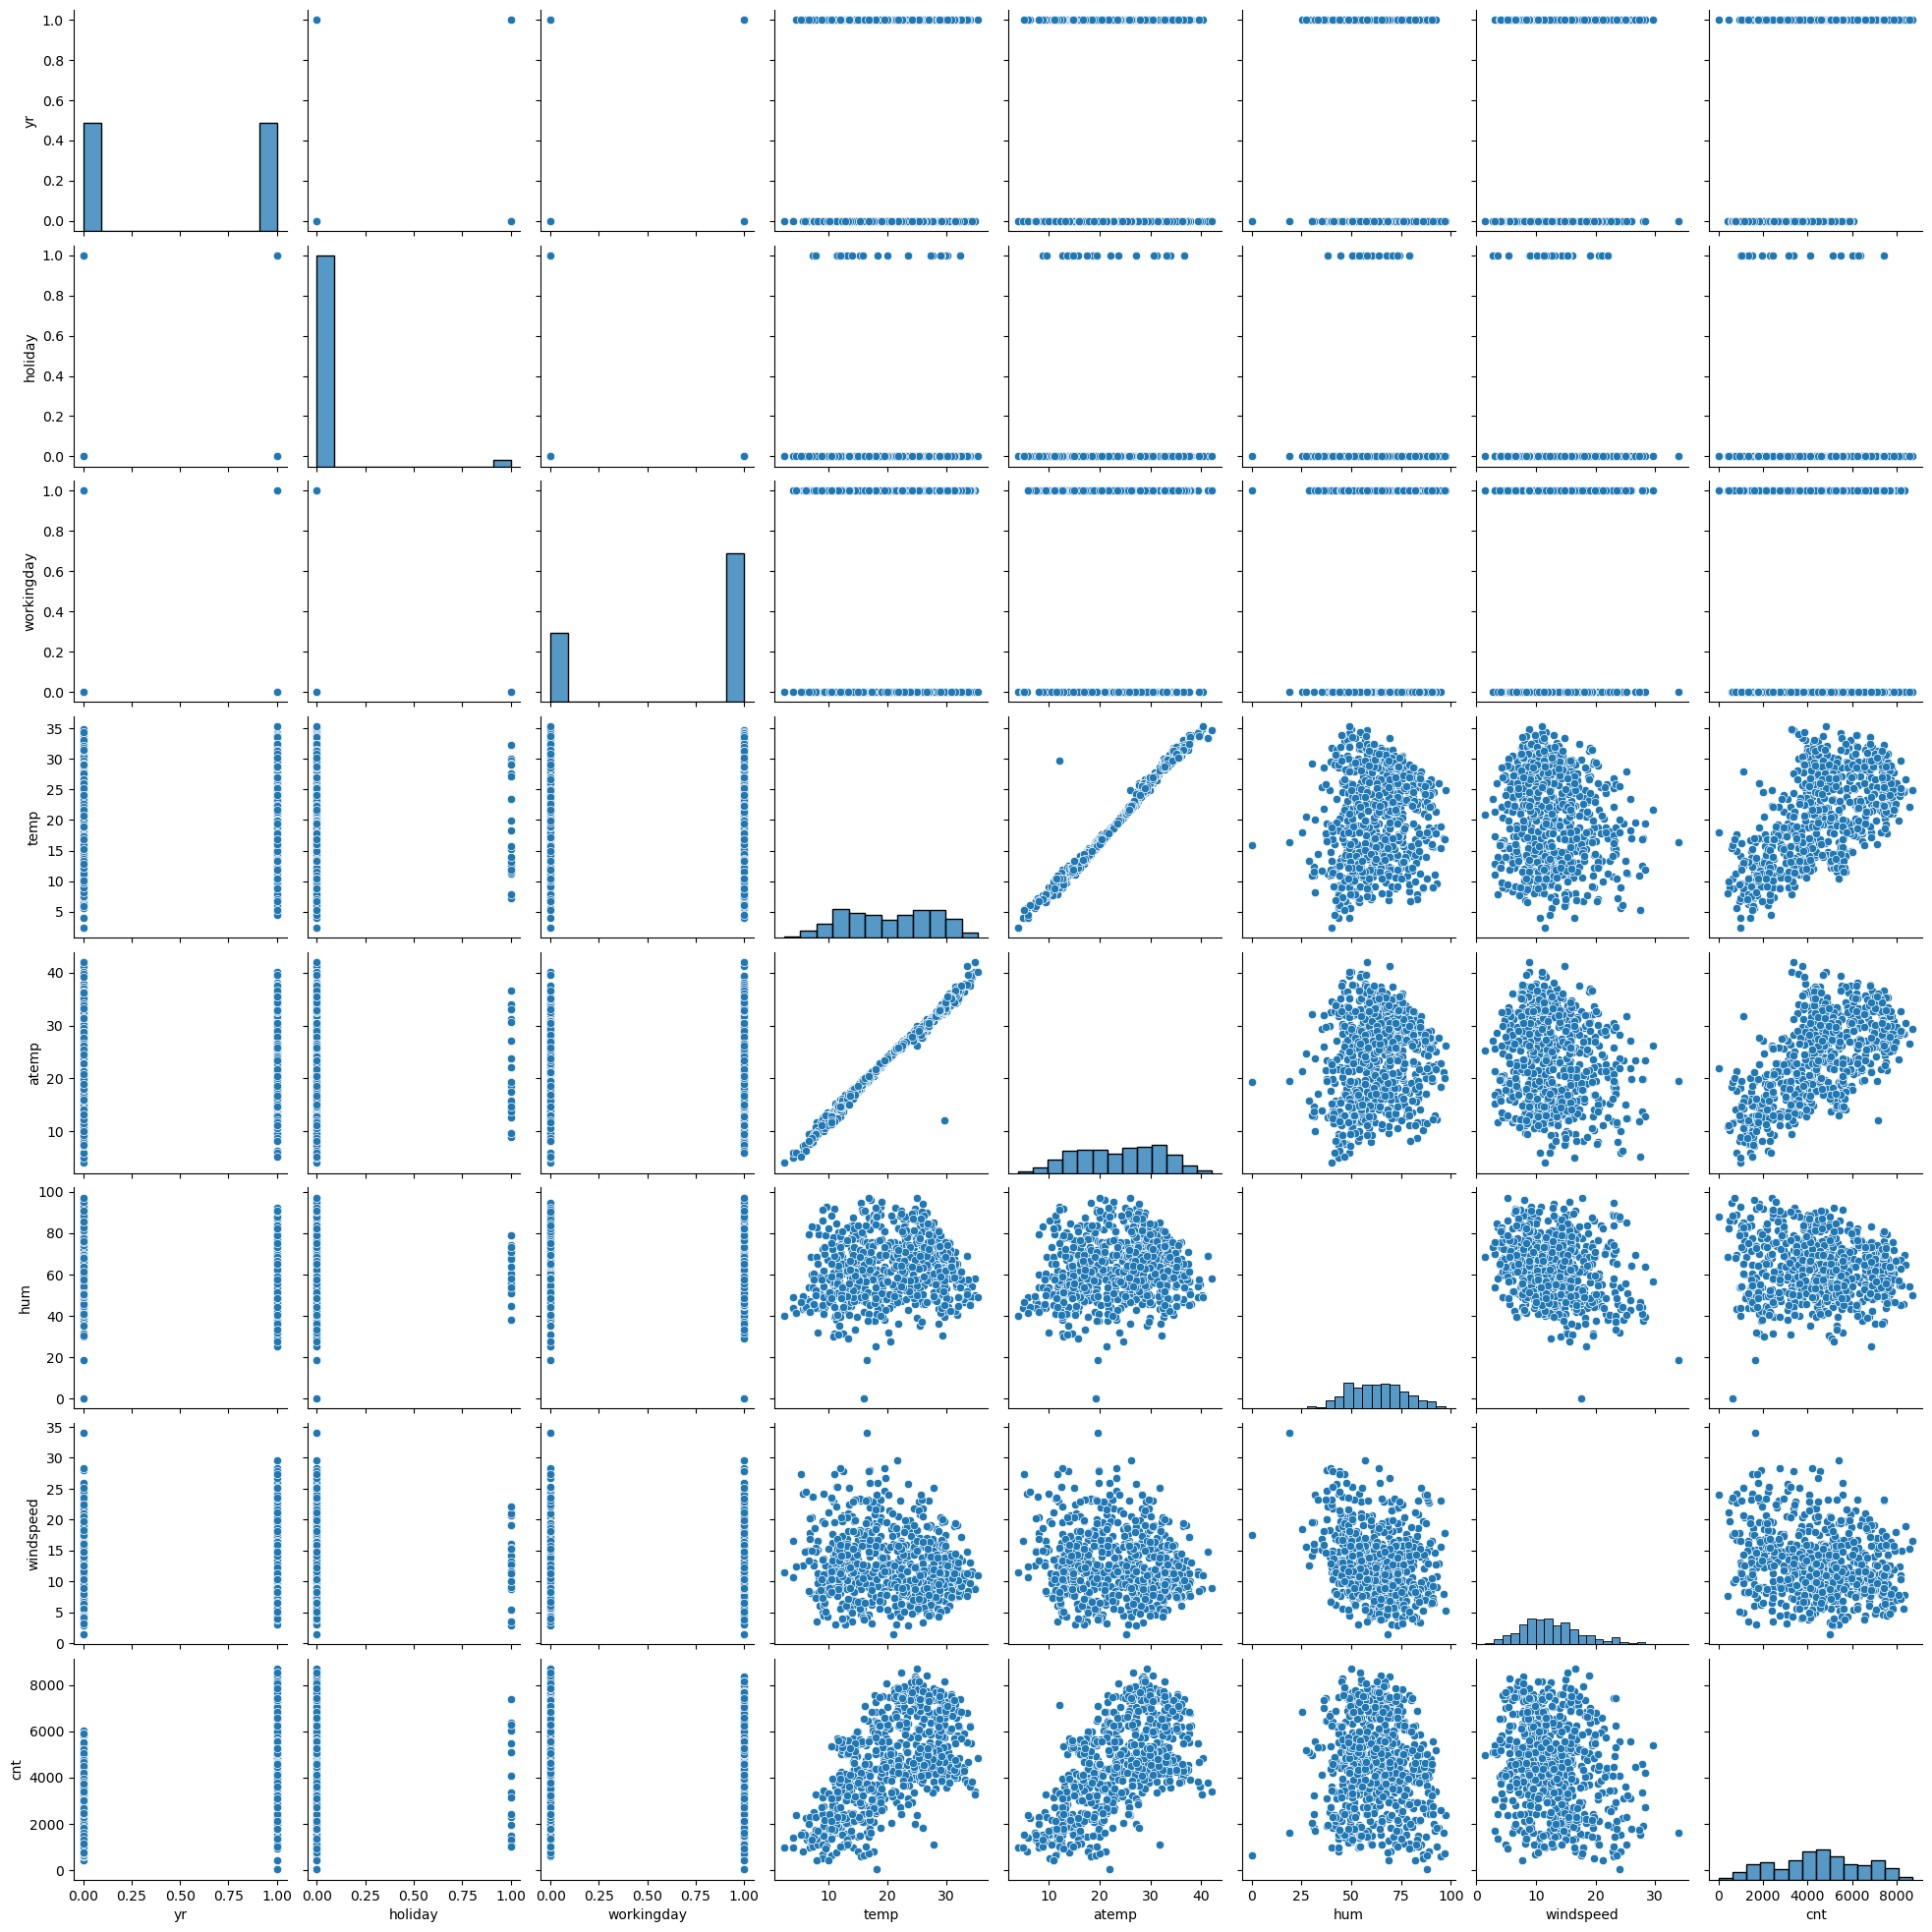

In [164]:
sns.pairplot(data)
plt.show()

#Looks like there is linear corelation between temp  and atemp columns

**As per pair plot above, it shows there is a linear relationship between temp, atemp and cnt**

**Visualize categorical columns also**


<Axes: xlabel='weekday', ylabel='cnt'>

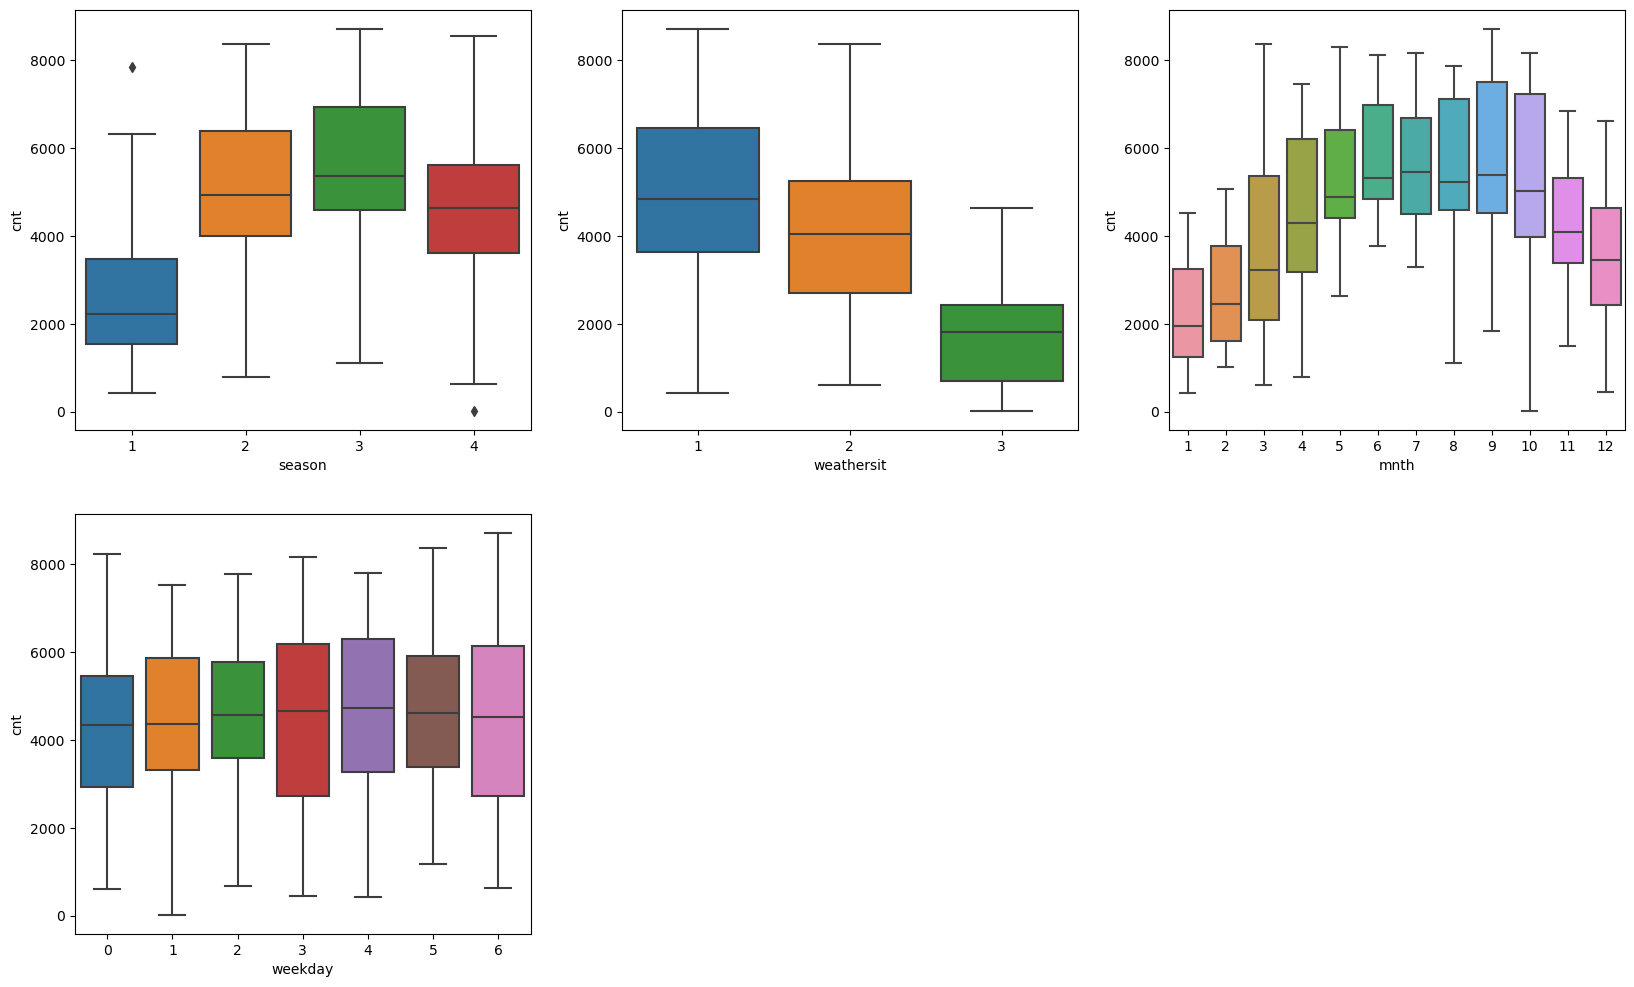

In [165]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)

1. More bikers ride in summer and fall seasons
2. More rides on Clear, Few clouds, Partly cloudy, Partly cloudy
3. More rides during May-Oct months
4. Seems like rides are on average same in demand across all weekdays 

### Correlation Matrix

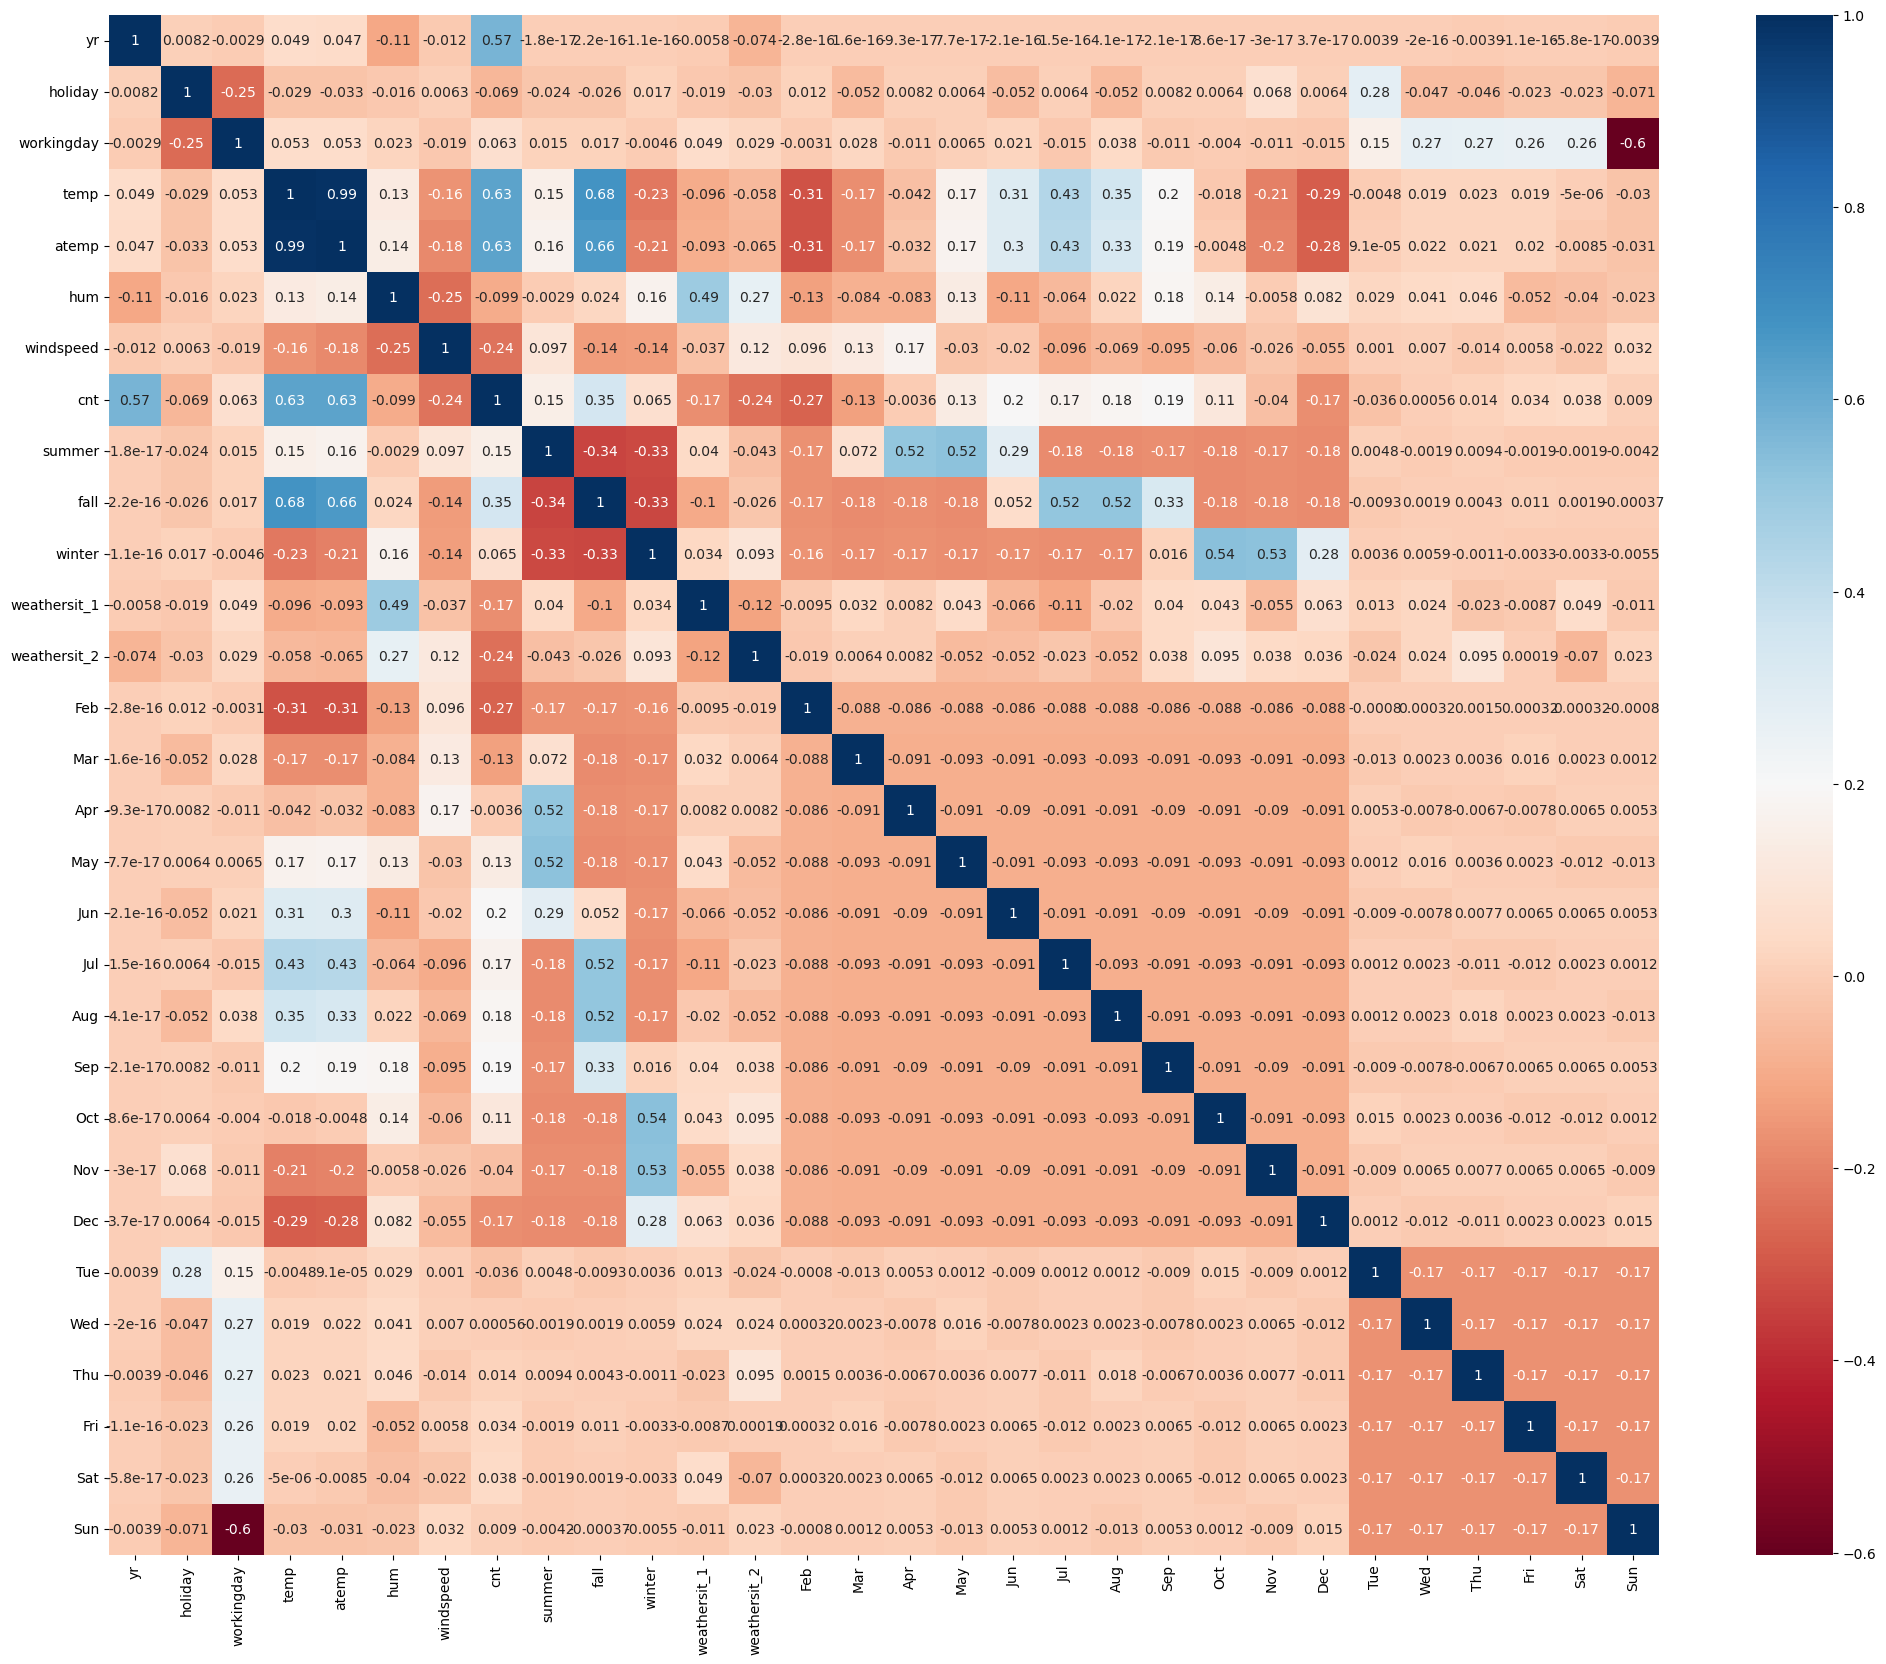

In [210]:
plt.figure(figsize = (25,20))
sns.heatmap(data.corr(), annot = True, cmap="RdBu")
plt.show()

**From above heat map, we can see that yr, temp, atemp have high collinearity with cnt.**

**Also we can see that few indepdendent variables also have multicollinearity**

## Step 3: Data Preparation
**Create Dummy Variables**
For all categorical variables - season, weathersit, mnth, weekday


In [166]:
#Create dummies for season of size n-1
season = pd.get_dummies(data['season'], drop_first = True)
season.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [167]:
# Add it to the data 

data = pd.concat([data, season], axis = 1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,2,3,4
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [168]:
# Drop 'season' as now using dummies only

data.drop(['season'], axis = 1, inplace = True)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,2,3,4
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [169]:
#Rename columns with more meaningful names
data.rename(columns = {2:'summer',3:'fall',4:'winter'}, inplace = True)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [170]:
#Create dummies for weathersit of size n-1
weathersit = pd.get_dummies(data['weathersit'], drop_first = True)
# Add it to the data 
data = pd.concat([data, weathersit], axis = 1)
# Drop 'weathersit' as now using dummies only
data.drop(['weathersit'], axis = 1, inplace = True)
data.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,2,3
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [171]:
#Rename columns with more meaningful names
data.rename(columns = {2:'weathersit_1',3:'weathersit_2'}, inplace = True)
data.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,weathersit_1,weathersit_2
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [172]:
#Create dummies for mnth of size n-1
mnth = pd.get_dummies(data['mnth'], drop_first = True)
# Add it to the data 
data = pd.concat([data, mnth], axis = 1)
# Drop 'mnth' as now using dummies only
data.drop(['mnth'], axis = 1, inplace = True)
data.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,...,3,4,5,6,7,8,9,10,11,12
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   dteday        730 non-null    object  
 1   yr            730 non-null    int64   
 2   holiday       730 non-null    int64   
 3   weekday       730 non-null    category
 4   workingday    730 non-null    int64   
 5   temp          730 non-null    float64 
 6   atemp         730 non-null    float64 
 7   hum           730 non-null    float64 
 8   windspeed     730 non-null    float64 
 9   cnt           730 non-null    int64   
 10  summer        730 non-null    uint8   
 11  fall          730 non-null    uint8   
 12  winter        730 non-null    uint8   
 13  weathersit_1  730 non-null    uint8   
 14  weathersit_2  730 non-null    uint8   
 15  2             730 non-null    uint8   
 16  3             730 non-null    uint8   
 17  4             730 non-null    uint8   
 18  5         

In [173]:
#Rename columns with more meaningful names
data.rename(columns = {2:'Feb',3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul',8:'Aug', 9:'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace = True)
data.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
#Create dummies for weekday of size n-1
weekday = pd.get_dummies(data['weekday'], drop_first = True)
# Add it to the data 
data = pd.concat([data, weekday], axis = 1)
# Drop 'weekday' as now using dummies only
data.drop(['weekday'], axis = 1, inplace = True)
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Sep,Oct,Nov,Dec,1,2,3,4,5,6
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [175]:
#Rename columns with more meaningful names
data.rename(columns = {1:'Tue',2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}, inplace = True)
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Sep,Oct,Nov,Dec,Tue,Wed,Thu,Fri,Sat,Sun
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [206]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

**Rescaling the Features**

Using Min-Max scaling

In [207]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    float64
 8   summer        510 non-null    uint8  
 9   fall          510 non-null    uint8  
 10  winter        510 non-null    uint8  
 11  weathersit_1  510 non-null    uint8  
 12  weathersit_2  510 non-null    uint8  
 13  Feb           510 non-null    uint8  
 14  Mar           510 non-null    uint8  
 15  Apr           510 non-null    uint8  
 16  May           510 non-null    uint8  
 17  Jun           510 non-null    uint8  
 18  Jul           510 non-null   

In [23]:
df_train.shape

(510, 30)

In [28]:
df_test.shape

(219, 30)

Dividing into X and Y sets for the model building

In [178]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with **RFE** (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [179]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [180]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [181]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('weathersit_1', True, 1),
 ('weathersit_2', True, 1),
 ('Feb', False, 3),
 ('Mar', False, 2),
 ('Apr', False, 2),
 ('May', True, 1),
 ('Jun', False, 2),
 ('Jul', False, 3),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', False, 2),
 ('Nov', False, 3),
 ('Dec', False, 3),
 ('Tue', False, 3),
 ('Wed', False, 3),
 ('Thu', False, 3),
 ('Fri', False, 3),
 ('Sat', False, 3),
 ('Sun', True, 1)]

In [182]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'summer', 'fall',
       'winter', 'weathersit_1', 'weathersit_2', 'May', 'Aug', 'Sep', 'Sun'],
      dtype='object')

In [183]:
X_train.columns[~rfe.support_]

Index(['holiday', 'atemp', 'Feb', 'Mar', 'Apr', 'Jun', 'Jul', 'Oct', 'Nov',
       'Dec', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'],
      dtype='object')

### Building model using statsmodel

In [184]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [185]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [186]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [187]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.9
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          1.50e-190
Time:                        18:03:25   Log-Likelihood:                 515.19
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     495   BIC:                            -936.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1821      0.029      6.352   

***Fall and May are insignificant as having p-value much higher than 0.05 so can be drop***

In [188]:
X_train_new = X_train_rfe.drop(['fall', 'May'], axis = 1)

In [189]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         510 non-null    float64
 1   yr            510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   hum           510 non-null    float64
 5   windspeed     510 non-null    float64
 6   summer        510 non-null    uint8  
 7   winter        510 non-null    uint8  
 8   weathersit_1  510 non-null    uint8  
 9   weathersit_2  510 non-null    uint8  
 10  Aug           510 non-null    uint8  
 11  Sep           510 non-null    uint8  
 12  Sun           510 non-null    uint8  
dtypes: float64(4), int64(2), uint8(7)
memory usage: 31.4 KB


### Rebuilding the model 

In [190]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.7
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          2.47e-192
Time:                        18:03:33   Log-Likelihood:                 513.83
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     497   BIC:                            -946.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1773      0.028      6.236   

In [203]:
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'summer', 'winter',
       'weathersit_1', 'weathersit_2', 'Aug', 'Sep', 'Sun'],
      dtype='object')

In [192]:
#Drop Const also
X_train_new = X_train_new.drop(['const'], axis=1)

In [193]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.05
2,temp,9.76
1,workingday,4.53
4,windspeed,3.76
7,weathersit_1,2.12
0,yr,2.02
5,summer,1.82
11,Sun,1.79
6,winter,1.75
9,Aug,1.59


In [194]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.7
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          2.47e-192
Time:                        18:03:44   Log-Likelihood:                 513.83
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     497   BIC:                            -946.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1773      0.028      6.236   

### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [202]:
y_train_cnt = lm.predict(X_train_lm)

### ASSUMPTIONS
1. Error terms are normally distributed with mean zero (not X, Y)
2. There is a linear relationship between X and Y
3. There is No Multicollinearity between the predictor variables 

Text(0.5, 0, 'Errors')

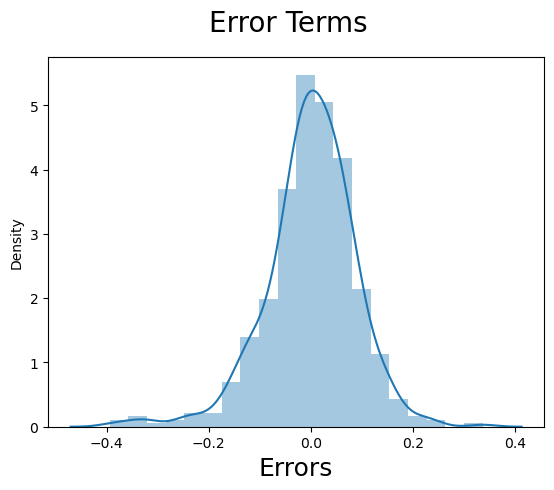

In [196]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions
Applying the scaling on the test sets

In [197]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [198]:
y_test = df_test.pop('cnt')
X_test = df_test

In [199]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [200]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

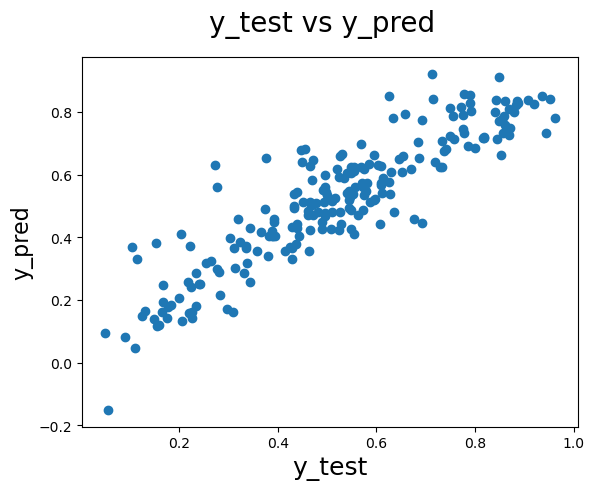

In [201]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label